In [42]:
%pylab inline

import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler         # to normalize data
from sklearn.model_selection import train_test_split     # To split in train and test set
from sklearn.model_selection import cross_val_score      # Cross Validation Score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression      # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier       # k-Nearest Neighbours classifier
from sklearn.metrics import confusion_matrix, classification_report # Reports functions
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook

sns.set(style="white")

Populating the interactive namespace from numpy and matplotlib


C:\Users\Marik\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Setting up the dataset

After loading the .csv file, we have to tinker with the dataset to turn in into the standard format used by the sklearn modules.

* Replace all Neighborhoods' names, convert to range {0-80}
* Replace all Genders' letters, {M,F} => {0,1}
* Replace all No-show booleans, {No,Yes} => {0,1}



In [31]:
# Read CSV file
noShow = pd.read_csv('NoShow.csv')

# Change Neighbourhood input type to numbers
# All 81 different ones...
XN = noShow['Neighbourhood']
XN2 = []
for i in XN:
    if i == 'JARDIM DA PENHA':
        XN2.append(0)
    elif i == 'MATA DA PRAIA':
        XN2.append(1)
    elif i == 'PONTAL DE CAMBURI':
        XN2.append(2)
    elif i == 'REPÚBLICA':
        XN2.append(3)   
    elif i == 'GOIABEIRAS':
        XN2.append(4)    
    elif i == 'ANDORINHAS':
        XN2.append(5)    
    elif i == 'CONQUISTA':
        XN2.append(6)
    elif i == 'NOVA PALESTINA':
        XN2.append(7)    
    elif i == 'DA PENHA':
        XN2.append(8)    
    elif i == 'TABUAZEIRO':
        XN2.append(9)    
    elif i == 'BENTO FERREIRA':
        XN2.append(10)    
    elif i == 'SÃO PEDRO':
        XN2.append(11)    
    elif i == 'SANTA MARTHA':
        XN2.append(12)    
    elif i == 'SÃO CRISTÓVÃO':
        XN2.append(13)    
    elif i == 'MARUÍPE':
        XN2.append(14)    
    elif i == 'GRANDE VITÓRIA':
        XN2.append(15)   
    elif i == 'SÃO BENEDITO':
        XN2.append(16)    
    elif i == 'ILHA DAS CAIEIRAS':
        XN2.append(17)    
    elif i == 'SANTO ANDRÉ':
        XN2.append(18)    
    elif i == 'SOLON BORGES':
        XN2.append(19)   
    elif i == 'BONFIM':
        XN2.append(20)    
    elif i == 'JARDIM CAMBURI':
        XN2.append(21)    
    elif i == 'MARIA ORTIZ':
        XN2.append(22)    
    elif i == 'JABOUR':
        XN2.append(23)
    elif i == 'ANTÔNIO HONÓRIO':
        XN2.append(24)    
    elif i == 'RESISTÊNCIA':
        XN2.append(25)    
    elif i == 'ILHA DE SANTA MARIA':
        XN2.append(26)
    elif i == 'JUCUTUQUARA':
        XN2.append(27)    
    elif i == 'MONTE BELO':
        XN2.append(28)    
    elif i == 'MÁRIO CYPRESTE':
        XN2.append(29)    
    elif i == 'SANTO ANTÔNIO':
        XN2.append(30)    
    elif i == 'BELA VISTA':
        XN2.append(31)    
    elif i == 'PRAIA DO SUÁ':
        XN2.append(32)    
    elif i == 'SANTA HELENA':
        XN2.append(33)    
    elif i == 'ITARARÉ':
        XN2.append(34)    
    elif i == 'INHANGUETÁ':
        XN2.append(35)    
    elif i == 'UNIVERSITÁRIO':
        XN2.append(36)    
    elif i == 'SÃO JOSÉ':
        XN2.append(37)    
    elif i == 'REDENÇÃO':
        XN2.append(38)    
    elif i == 'SANTA CLARA':
        XN2.append(39)    
    elif i == 'CENTRO':
        XN2.append(40)    
    elif i == 'PARQUE MOSCOSO':
        XN2.append(41)    
    elif i == 'DO MOSCOSO':
        XN2.append(42)    
    elif i == 'SANTOS DUMONT':
        XN2.append(43)    
    elif i == 'CARATOÍRA':
        XN2.append(44)    
    elif i == 'ARIOVALDO FAVALESSA':
        XN2.append(45)    
    elif i == 'ILHA DO FRADE':
        XN2.append(46)    
    elif i == 'GURIGICA':
        XN2.append(47)   
    elif i == 'JOANA D´ARC':
        XN2.append(48)    
    elif i == 'CONSOLAÇÃO':
        XN2.append(49)    
    elif i == 'PRAIA DO CANTO':
        XN2.append(50)    
    elif i == 'BOA VISTA':
        XN2.append(51)    
    elif i == 'MORADA DE CAMBURI':
        XN2.append(52)    
    elif i == 'SANTA LUÍZA':
        XN2.append(53)    
    elif i == 'SANTA LÚCIA':
        XN2.append(54)    
    elif i == 'BARRO VERMELHO':
        XN2.append(55)    
    elif i == 'ESTRELINHA':
        XN2.append(56)    
    elif i == 'FORTE SÃO JOÃO':
        XN2.append(57)    
    elif i == 'FONTE GRANDE':
        XN2.append(58)    
    elif i == 'ENSEADA DO SUÁ':
        XN2.append(59)    
    elif i == 'SANTOS REIS':
        XN2.append(60)    
    elif i == 'PIEDADE':
        XN2.append(61)    
    elif i == 'JESUS DE NAZARETH':
        XN2.append(62)    
    elif i == 'SANTA TEREZA':
        XN2.append(63)
    elif i == 'CRUZAMENTO':
        XN2.append(64)
    elif i == 'ILHA DO PRÍNCIPE':
        XN2.append(65)   
    elif i == 'ROMÃO':
        XN2.append(66)    
    elif i == 'COMDUSA':
        XN2.append(67)   
    elif i == 'SANTA CECÍLIA':
        XN2.append(68)    
    elif i == 'VILA RUBIM':
        XN2.append(69)    
    elif i == 'DE LOURDES':
        XN2.append(70)  
    elif i == 'DO QUADRO':
        XN2.append(71)    
    elif i == 'DO CABRAL':
        XN2.append(72)    
    elif i == 'HORTO':
        XN2.append(73)    
    elif i == 'SEGURANÇA DO LAR':
        XN2.append(74)    
    elif i == 'ILHA DO BOI':
        XN2.append(75)    
    elif i == 'FRADINHOS':
        XN2.append(76)   
    elif i == 'NAZARETH':
        XN2.append(77)   
    elif i == 'AEROPORTO':
        XN2.append(78)   
    elif i == 'ILHAS OCEÂNICAS DE TRINDADE':
        XN2.append(79)    
    elif i == 'PARQUE INDUSTRIAL':
        XN2.append(80)
        
XN3 = asarray(XN2)
noShow['Neighbourhood'] = XN3

# Change Gender input type to binaries
XG = noShow['Gender']
XG2 = []
for i in XG:
    if i == 'M':
        XG2.append(0)
    elif i == 'F':
        XG2.append(1)

XG3 = asarray(XG2)
noShow['Gender'] = XG3

# Change No-show output type to binaries
y = noShow['No-show']
y2 = []
for i in y:
    if i == 'No':
        y2.append(0)
    elif i == 'Yes':
        y2.append(1)
        
y3 = asarray(y2)
noShow['No-show'] = y3
y = asarray(noShow['No-show'])

# Delete unused data columns from group, and turn into a normal array.
Xii = asarray(noShow)
Xi = np.delete(Xii,[0,1,3,4,13],axis=1)
X = Xi.astype(None)

# Split data into 80/20 train/test. Scale, fit and transform data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The three classifiers used in this project.
knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=2, random_state=0)

## Performance with Default parameter settings

This is the main() function to check each classifier's default value scores.

In [19]:
def main(clr):
    if clr == knn:
        name = 'K-Nearest Neighbour'
    elif clr == lr:
        name = 'Logistic Regression'
    elif clr == rf:
        name = 'Random Forest'
    model = clr.fit(X_train_scaled, y_train)
    score = cross_val_score(model, X, y, cv=10)
    y_predict = clr.predict(X)
    report = classification_report(y, y_predict)
    print('\nResults for the',name,'classifier.'
          '\n\nCross Validation:',
          '\n Average Score:',average(score),
          '\n stdev:        ',score.std(),
          '\n\nClassification Report:'
          '\n',report)

Now, we use the main function for the three classifier methods.

In [44]:
main(lr)
main(rf)
main(knn)


Results for the Logistic Regression classifier.

Cross Validation: 
 Average Score: 0.798067441249 
 stdev:         1.76535570047e-05 

Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.97      0.87     88208
          1       0.20      0.03      0.06     22319

avg / total       0.68      0.78      0.71    110527


Results for the Random Forest classifier.

Cross Validation: 
 Average Score: 0.749844032418 
 stdev:         0.00572587214531 

Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.93      0.86     88208
          1       0.17      0.06      0.09     22319

avg / total       0.67      0.75      0.70    110527


Results for the K-Nearest Neighbour classifier.

Cross Validation: 
 Average Score: 0.759470616435 
 stdev:         0.00660554344508 

Classification Report:
              precision    recall  f1-score   support

          0       0.79      0.91      0.8

It is visible that the highest average lies with Logistic Regression, although the difference is not very big.

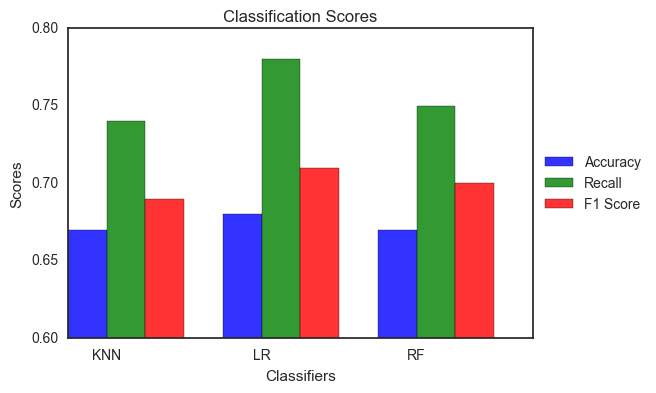

In [50]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X)

knn_acc = 0.67
knn_rec = 0.74 
knn_f1 = 0.69

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X)
lr_acc = 0.68
lr_rec = 0.78
lr_f1 = 0.71

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X)
rf_acc = 0.67
rf_rec = 0.75
rf_f1 = 0.70

n_groups = 3

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, [knn_acc, lr_acc, rf_acc], bar_width, alpha=opacity,color='b',label='Accuracy')

rects2 = plt.bar(index + bar_width, [knn_rec, lr_rec, rf_rec], bar_width, alpha=opacity,color='g',label='Recall')

rects2 = plt.bar(index + 2*bar_width, [knn_f1, lr_f1, rf_f1], bar_width, alpha=opacity,color='r',label='F1 Score')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classification Scores')
plt.xticks(index + bar_width, ('KNN', 'LR', 'RF'))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylim([0.6,0.8])

plt.show()

## Optimizing Parameters

Here, we tune the parameters of each classifier in an attempt to find the optimum. Normally, GridSearchCV() is used. However, with a data set this big, this would take ages to compute. Instead, we chose for RandomizedSearchCV(), which drastically cuts down computating time, and nearly always yields similar (or even better) results.

In [16]:
# K-Nearest Neighbours optimalization
k = np.arange(50)+1
params_knn = {'n_neighbors': k}

clf_knn = RandomizedSearchCV(knn, params_knn)
clf_knn.fit(X_train, y_train)
best_knn = clf_knn.best_params_

# Logistic Regression optimalization
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
params_lr = {'C': c}

clf_lr = RandomizedSearchCV(lr, params_lr)
clf_lr.fit(X_train, y_train)
best_lr = clf_lr.best_params_

# Random Forest optimalization
e = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
params_rf = {'n_estimators': e}

clf_rf = RandomizedSearchCV(rf, params_rf)
clf_rf.fit(X_train, y_train)
best_rf = clf_rf.best_params_

print('Optimized parameters'
      '\n K-Nearest Neighbours:',best_knn,
      '\n Logistic Regression: ',best_lr,
      '\n Random Forest:       ',best_rf)

Optimized parameters
 K-Nearest Neighbours: {'n_neighbors': 48} 
 Logistic Regression:  {'C': 0.0001} 
 Random Forest:        {'n_estimators': 1200}


Backup (this took 10+ minutes to load)

    Optimized parameters
     K-Nearest Neighbours: {'n_neighbors': 48} 
     Logistic Regression:  {'C': 0.0001} 
     Random Forest:        {'n_estimators': 1200}

To verify that the RandomizedSearchCV did find a good score, we can draw a graph with the surrounding points. This is only done for k-nn, for having a visual image of the optimalization.

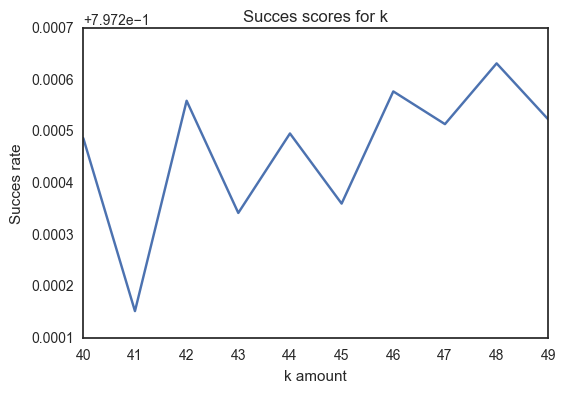

In [56]:
k_list = []

def main2(clr, los):
    model = clr.fit(X_train_scaled, y_train)
    score = cross_val_score(model, X, y, cv=10)
    los.append(average(score))

K = range(40,50)
for i in K:
    knn = KNeighborsClassifier(n_neighbors = i)
    main2(knn, k_list)
               
plt.title("Succes scores for k")
plt.ylabel("Succes rate")
plt.xlabel("k amount")
plt.plot(K,k_list)

In [64]:
def main3(clr):
    if clr == knn:
        name = 'K-Nearest Neighbour'
    elif clr == lr:
        name = 'Logistic Regression'
    elif clr == rf:
        name = 'Random Forest'
    model = clr.fit(X_train_scaled, y_train)
    y_predict = clr.predict(X)
    report = confusion_matrix(y, y_predict)
    print('\nConfusion Matrix for the',name,'classifier.'
          '\n',report)

In [65]:
main3(lr)


Confusion Matrix for the Logistic Regression classifier.
 [[83552  4656]
 [21085  1234]]
